# TP2 - Gain et Phase

Nicolas Lienart & Guillaume Haerinck. Traitement du signal IMAC 2019

# 0 - Introduction

## 0.1 - Imports

In [1]:
# Data manipulation
import numpy as np

# Inputs & outputs
from scipy.io import wavfile as io

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline

# External scripts
%run "signal_mono"

## 0.2 - Définitions

- **TFTD** : Transformée de Fourier à temps discret

## 0.3 - Référence code

- [np.vdot()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.vdot.html) : Produit scalaire hermitien

# 1 - Création de signal

Soit $f_0$ une fréquence donnée et G et P deux vecteurs de même taille - disons $N$. Les composantes de $G$ sont positives (ce sont les gains) et celles de $P$ sont des angles exprimés en radians (ce sont les phases) : voir l'exercice no1 de la seconde feuille de TD sur les séries de Fourier. On associe alors le signal 
$$
x(t)=\sum_{n=0}^{N-1}G_n \cos(2\pi n f_0 t+ P_n).
$$

## 1.1 Fonction signal périodique

Codez  une fonction Python que vous nommerez **creer_signal_periodique** qui à $P,G,f_0$ et aussi une durée $T$ et une fréquence d'échantillonnage $F_s$ retourne un signal de la classe **signal_mono** 

In [2]:
def creer_signal_periodique(Phase, Gain, f0, T, Fs):
    signalData = np.zeros(T.size)
    
    for Tindex in range(0, T.size):
        t = Tindex/Fs

        for n in range (0, Gain.size):
            signalData[Tindex] += Gain[n] * np.cos( 2*np.pi*(2*n + 1)*f0*t + Phase[n] )
        
       
        ## Pour former signal rectangulaire périodique de Fourier
        signalData[Tindex] += 1/2
    
    
    signal = creer_signal(signalData, Fs)
    
    return signal

## 1.2 - Rectangle périodique 

Reprenez l'exemple du rectangle périodique, pair, vu en cours. 

Exprimez les coefficients $G_k$ et $P_k$.

In [3]:
def rectanglePeriodique(t, f0):
    T0 = 1/f0
    condition = ( ((t%T0) <= (1/4)*T0) | ((t%T0) >= (3/4)*T0) )
    signalData = 1*condition
    return signalData

def phase(N):
    Phase = np.zeros(N)
    
    return Phase

def gain(N):
    Gain = np.arange(N, dtype = np.float)
    
    for n in range(Gain.size):
        Gain[n] = (2*(-1)**n) / (np.pi*(2*n +1))
            
    return Gain

## 1.3 Visualisation du signal périodique

Appliquez **creer_signal_periodique** avec les coefficients définis à la question précédente pour le choix des paramètres suivant : $N=20$, $f_0=440$Hz, $T=4$s et $F_s=22050$Hz. 

Visualisez le signal sur l'intervalle $[1, 1.01]$ (en secondes) : vous pourrez utiliser la fonction **extraire**. Ensuite, écoutez le signal.

In [4]:
N = 20
f0 = 440
#TODO: remove 44100
Fs = 22050
Ts = 1/Fs
duration = 4
t = np.arange(0, duration, Ts)

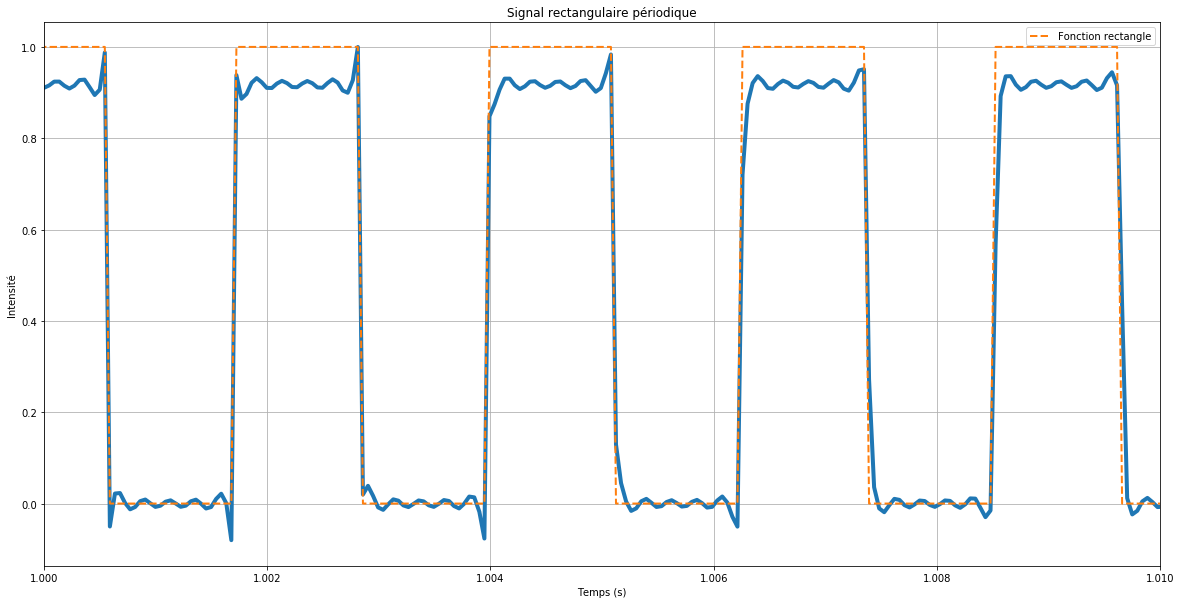

In [5]:
Gain = gain(N)
Phase = phase(N)

rectangle = rectanglePeriodique(t, f0)
signal_RectangulairePeriodiqueFourier = creer_signal_periodique(Phase, Gain, f0, t, Fs)

plt.figure(1, figsize = (20, 10))
plt.plot(signal_RectangulairePeriodiqueFourier.t, signal_RectangulairePeriodiqueFourier.x, linewidth=4)
plt.plot(t, rectangle, '--', linewidth=2, label='Fonction rectangle')
plt.xlabel('Temps (s)')
plt.ylabel('Intensité')
plt.title('Signal rectangulaire périodique')
plt.grid(which="both")
plt.legend(loc='upper right')
plt.xlim(1, 1.01)
plt.show()

#enregistrer_son("signal_periodique_P1_1.wav", signal_RectangulairePeriodiqueFourier, Fs)

## 1.4 - Phases aléatoires

Reprenez la question suivante mais, cette fois, au lieu des phases théoriques du rectangle choisissez des phases aléatoires (calculez un échantillon uniforme sur $[0,2\pi]$. 

Le graphe du signal obtenu  est-il très différent d'un rectangle périodique?

Percevez-vous une différence entre le son obtenu et le son du rectangle? 

In [6]:
def phase(N):
    Phase = np.random.uniform(0, 2*np.pi, N)
    return Phase

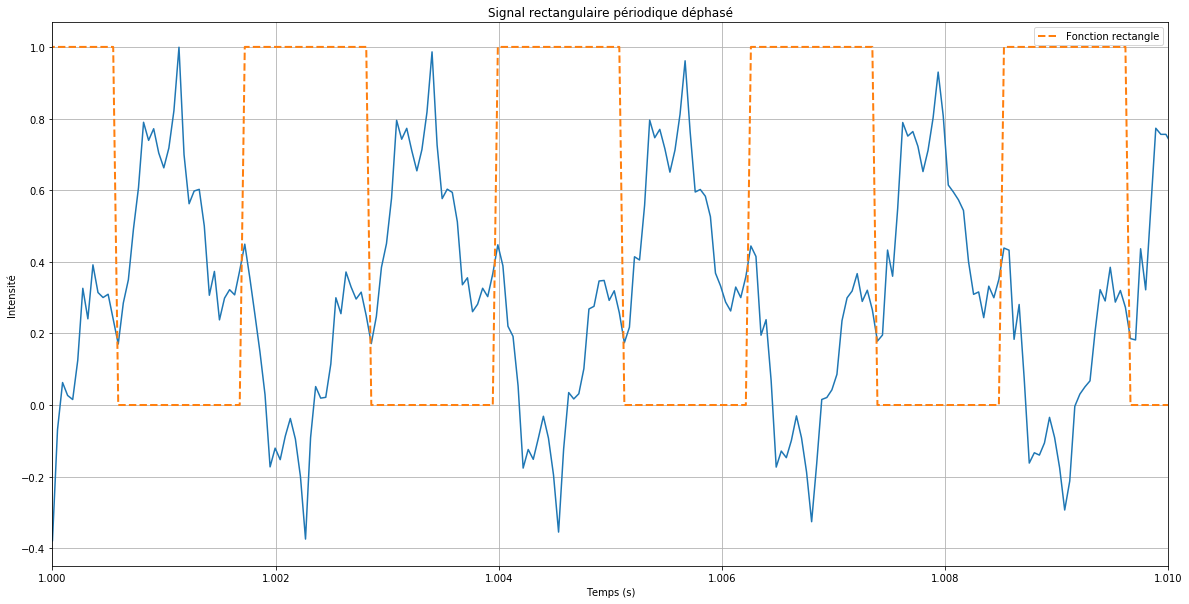

In [7]:
Phase = phase(N)

signal_RectangulaireDephase = creer_signal_periodique(Phase, Gain, f0, t, Fs)

plt.figure(1, figsize = (20, 10))
plt.plot(signal_RectangulaireDephase.t, signal_RectangulaireDephase.x)
plt.xlim(1, 1.01)
plt.plot(t, rectangle, '--', linewidth=2, label='Fonction rectangle')
plt.xlabel('Temps (s)')
plt.ylabel('Intensité')
plt.title('Signal rectangulaire périodique déphasé')
plt.grid(which="both")
plt.legend(loc='upper right')
plt.show()

enregistrer_son("signal_periodique_P1_2.wav", signal_RectangulairePeriodiqueFourier, Fs)

## TODO: Checker les résultats de la question 4) et 5) car j'ai un doute 
Le graphe obtenu présente de grosses différences. Bien que la période soit identique, ce qui est tout à fait normal, les harmoniques voient leur intensité changer.

Notre oreille n'est pas capable de distinguer la différence.

**5)** Choisissez un jeu de gains qui engendre, selon vous, un son intéressant (on dirait : un timbre qui vous plait. D'ailleurs, pourquoi vous plait-il?). Modifiez les phases de manière aléatoire et écoutez le "nouveau son". Cette expérience illustre-t-elle le principe selon lequel l'oreille n'est pas sensible aux phases? 

In [8]:
def phase(N):
    Phase = np.random.uniform(-np.pi, np.pi, N)

    return Phase

def gain(N):
    Gain = np.arange(N, dtype = np.float)
    
    for n in range(Gain.size):
        Gain[n] = -1**n / (3*n +4)
            
    return Gain

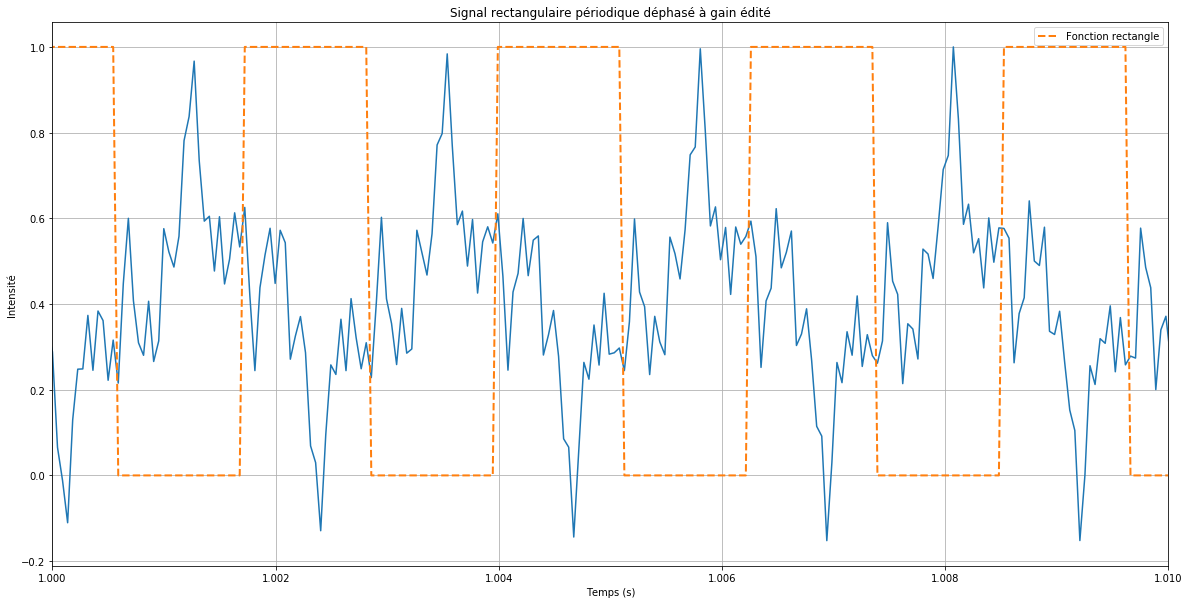

In [9]:
N = 20
f0 = 440
Fs = 22050
Ts = 1/Fs
t = np.arange(0, 4, Ts)
Gain = gain(N)
Phase = phase(N)

signalRectEven = creer_signal_periodique(Phase, Gain, f0, t, Fs)

plt.figure(1, figsize = (20, 10))
plt.plot(signalRectEven.t, signalRectEven.x)
plt.xlim(1, 1.01)
plt.plot(t, rectangle, '--', linewidth=2, label='Fonction rectangle')
plt.xlabel('Temps (s)')
plt.ylabel('Intensité')
plt.title('Signal rectangulaire périodique déphasé à gain édité')
plt.grid(which="both")
plt.legend(loc='upper right')
plt.show

enregistrer_son("signal_periodique_P1_3.wav", signalRectEven, Fs)

Les changements de gains sont plutôt facilement perceptibles
cependant les manipulations sur la phase ne le sont pas du tout. On peut tirer de cette experience que l'impact du déphasage n'est pas un paramètre perceptible pour l'oreille humaine.

---

# 2 - Calculs

Soit le signal de période $2\pi$ défini pour tout entier $k\geq 0$ et tout $t\in[0,2\pi]$ par :  
$$
x_k(t)=t^k.
$$
Notons $c_k[n]$ les coefficients de Fourier de $x_k$. Faites attention à la position des indices! 

## 2.1 - $c_k[n]$

Rappelez l'expression de $c_k[n]$.

$$c_k[n]=\frac{1}{T_{0}}\cdot\int_{(T_{0})}x(t)\cdot\exp(-i 2\pi nf_{0}t)\, dt$$
Ici on a 
$$c_k[n]=\frac{1}{2\pi}\cdot\int_{0}^{2\pi}t^k\cdot\exp(-i n t)\, dt$$

## 2.2 - $c_k[0]$

Calculez pour tout entier naturel $k$ le coefficient $c_k[0]$.

$$
\begin{alignat*}{1}
C_{k}[0]= & \frac{1}{2\pi}\int_{0}^{2\pi}t^{k}e^{0}dt\\
= & \frac{i}{2\pi}\left[\frac{1}{k+1}t^{k+1}\right]_{0}^{2\pi}\\
= & \frac{1}{2\pi(k+1)}\left((2\pi){}^{k+1}-0^{k+1}\right)\\
= & \frac{(2\pi)^{k+1}}{2\pi(k+1)}\\
C_{k}[0]= & \fbox {$ \frac{(2\pi)^{k}}{k+1} $}
\end{alignat*}
$$

## 2.3 - $c_0[n]$

Calculez $c_0[n]$ pour tout $n\neq 0$

$$
\begin{alignat*}{1}
C_{0}[n]= & \frac{1}{2\pi}\int_{0}^{2\pi}t^{0}e^{-int}dt\\
= & \frac{1}{2\pi(-in)}\left(e^{-in2\pi}-e^{-in0}\right)\\
= & \frac{1}{2\pi}\left[\frac{e^{-int}}{-in}\right]_{0}^{2\pi}\\
= & \frac{1}{2\pi(-in)}(1-1)\\
C_{0}[n]= & 0
\end{alignat*}
$$

## 2.4 - IPP bien choisie

En effectuant une IPP bien choisie montrez que pour tout $k\geq 1$ et tout $n\neq 0$ on a 
$$
c_k[n]=\frac{i}{n} \left(\alpha_k -\beta_k c_{k-1}[n]   \right)  
$$
où vous déterminerez les constantes $\alpha_k$ et $\beta_k$. 

On pose

$$
\begin{alignat*}{1}
C_{k}[n]= & \frac{1}{2\pi}\int_{0}^{2\pi}t^{k}\exp(-i2\pi nf_{0}t)dt\\
\end{alignat*}
$$

Première IPP avec $u=\frac{exp({-int})}{-in}$ et $v'=kt^{k-1}$

$$
\begin{alignat*}{1}
C_{k}[n]= & \frac{1}{2\pi}\left(\left[t^{k}\frac{\exp(-int)}{-in}\right]_{0}^{2\pi}-\int_{0}^{2\pi}kt^{k-1}\frac{\exp(-int)}{-in}dt\right)\\
= & \frac{1}{2\pi}\left(\frac{1}{-in}\left[t^{k}e^{-int}\right]_{0}^{2\pi}-\frac{1}{-in}\int_{0}^{2\pi}kt^{k-1}e^{-int}dt\right)\\
= & \frac{1}{2\pi(-in)}\left((2\pi)^{k}e^{-i2\pi t}-k\int_{0}^{2\pi}t^{k-1}e^{-int}dt\right)
\end{alignat*}
$$

Seconde IPP avec $u=\frac{exp({-int})}{-in}$ et $v'=(k-1)t^{k-2}$

$$
\begin{alignat*}{1}
C_{k}[n]= & \frac{1}{2\pi(-in)}\left((2\pi)^{k}-k\left(\left[t^{k-1}\frac{e^{-int}}{-in}\right]_{0}^{2\pi}-\int_{0}^{2\pi}(k-1)t^{k-2}\frac{e^{-int}}{-in}dt\right)\right)\\
= & \frac{1}{2\pi(-in)}\left((2\pi)^{k}-k\left(\frac{1}{-in}\left[t^{k-1}e^{-int}\right]_{0}^{2\pi}-\frac{k-1}{-in}\int_{0}^{2\pi}t^{k-2}e^{-int}dt\right)\right)\\
= & \frac{1}{2\pi(-in)}\left((2\pi)^{k}-\frac{k}{-in}\left(\left[t^{k-1}e^{-int}\right]_{0}^{2\pi}+(1-k)\int_{0}^{2\pi}t^{k-2}e^{-int}dt\right)\right)\\
\end{alignat*}
$$

On note que $\exp(-i2\pi t) = \cos(2\pi) + i\sin(2\pi) = 1$

$$
\begin{alignat*}{1}
C_{k}[n]= & \frac{1}{2\pi(-in)}\left((2\pi)^{k}-\frac{k}{-in}\left((2\pi)^{k-1}+(1-k)\int_{0}^{2\pi}t^{k-2}e^{-int}dt\right)\right)\\
= & \frac{1}{2\pi(-in)}\left((2\pi)^{k}-k\int_{0}^{2\pi}t^{k-1}e^{-int}dt\right) \\
= & \frac{1}{-in}\left(\frac{(2\pi)^{k}}{2\pi}-k\frac{1}{2\pi}\int_{0}^{2\pi}t^{k-1}e^{-int}dt\right)\\
= & \frac{1}{-in}\left((2\pi)^{k-1}-k(C_{k-1}[n])\right)\\
= & \frac{i}{i}\frac{i}{-in}\left((2\pi)^{k-1}-k(C_{k-1}[n])\right)\\
C_{k}[n] = & \fbox {$ \frac{i}{n}\left(\alpha_{k}-\beta_k(C_{k-1}[n])\right) $}
\end{alignat*}
$$

On trouve donc pour $\alpha_k$ et $\beta_k$.

$$\fbox {$ \alpha_{k}=(2\pi)^{k-1} $}$$

$$\fbox {$ \beta_{k}=k $}$$


## 2.5 - Récurrence 

Calculez, en utilisant la formule de récurrence précédente, $c_1[n]$ et $c_2[n]$ pour tout $n\neq 0$. 

On a donc 

\begin{alignat*}{1}
C_{k}[n]= & \frac{i}{n}\left(\alpha_{k}-\beta_{k}C_{k-1}[n]\right)\\
\end{alignat*}

On commence par calculer $C_1[k]$

\begin{alignat*}{1}
C_{1}[n]= & \frac{i}{n}(1-0)\\
C_{1}[n]= & \fbox {$ \frac{i}{n} $}
\end{alignat*}

Puis $C_2[k]$


$$\begin{alignat*}{1}
C_{2}[n]= & \frac{i}{n}(2\pi-2\frac{i}{n})\\
= & \frac{2i}{n}(\pi-\frac{i}{n})\\
= & \frac{i2\pi}{n}+\frac{2}{n^{2}}\\
C_{2}[n]= & \fbox {$ \frac{2}{n}\left(i\pi+\frac{1}{n}\right) $}
\end{alignat*}$$

## 2.6 - Coefficients de Fourier complexes

Soit maintenant la fonction $2\pi$-périodique définie sur $[0,2\pi]$ par $x(t)=\lambda_1 t +\lambda_2 t^2$ où $\lambda_1,\lambda_2$ sont des constantes. 

Quels sont les coefficients de Fourier complexes $c[n]$ de ce signal? (vous utiliserez les résultas de la question qui précède)

$$
\begin{alignat*}{1}
C[n]= & \frac{1}{2\pi}\int_{0}^{2\pi}\left(\lambda_{1}t+\lambda_{2}t^{2}\right)e^{-int}dt\\
= & \frac{1}{2\pi}\int_{0}^{2\pi}\lambda_{1}te^{-int}+\lambda_{2}t^{2}e^{-int}dt\\
= & \frac{1}{2\pi}\left(\int_{0}^{2\pi}\lambda_{1}te^{-int}dt+\int_{0}^{2\pi}\lambda_{1}te^{2-int}dt\right)\\
= & \frac{1}{2\pi}\left(\lambda_{1}\int_{0}^{2\pi}te^{-int}dt+\lambda_{2}\int_{0}^{2\pi}t^{2}e^{-int}dt\right)\\
= & \lambda_{1}\frac{1}{2\pi}\int_{0}^{2\pi}te^{-int}+\lambda_{2}\int_{0}^{2\pi}t^{2}e^{-int}dt\\
= & \lambda_{1}C_{1}[n]+\lambda_{2}C_{2}[n]\\
C[n]= & \fbox {$ \lambda_{1}\frac{i}{n}+\lambda_{2}\frac{2}{n}\left(i\pi+\frac{1}{n}\right) $}
\end{alignat*}
$$

## 2.7 - Condition de continuité du signal

Afin de répondre à la question  qui suit, reportez-vous aux résultats de l'exercice 4 de la seconde feuille d'exercices sur les séries de Fourier.

Quelle est la condition sur $\lambda_1$ et $\lambda_2$ pour que le signal soit continu sur $\mathbb{R}$? A quelle vitesse décroissent les coefficents de Fourier? Est-ce surprenant? 

$$
\begin{alignat*}{1}
C[n]= & \lambda_{1}\frac{i}{n}+\lambda_{2}\frac{2}{n}\left(i\pi+\frac{1}{n}\right)\\
= & \lambda_{1}\frac{i}{n}+\lambda_{2}\left(\frac{2i\pi}{n}+\frac{2}{n^{2}}\right)\\
= & \lambda_{1}\frac{i}{n}+\lambda_{2}\frac{1}{n}\left(2i\pi+\frac{2}{n}\right)\\
= & \frac{1}{n}\left(\lambda_{1}i+\lambda_{2}2\left(i\pi+\frac{1}{n}\right)\right)\\
= & \frac{1}{n}\left(\lambda_{1}i+\lambda_{2}\frac{2}{n}+2i\pi\lambda_{2}\right)\\
= & \frac{1}{n}\left(\lambda_{1}i+2i\pi\lambda_{2}\right)+\frac{1}{n^{2}}2\lambda_{2}
\end{alignat*}
$$

On sait maintenant que le signal décroit au moins aussi vite que $\frac{1}{n}$. Dans cette condition, le signal est discontinu. 

On cherche donc les valeurs $\lambda_1$ et $\lambda_2$ pour que le signal soit $\mathcal{O}\left(\frac{1}{n^2}\right)$. Pour cela, il faut que le contenu de la parenthèse gauche s'annule.

$$\lambda_{1}i+2\pi i\lambda_{2}=0$$
$$\lambda_1 = -2\pi\lambda_2$$


Donc le signal est continu sur $\mathbb{R}$ pour $\fbox{$ \lambda_1 = -2\pi\lambda_2$}$

## 2.8 - Décroissance des coefficients de Fourier

Si maintenant $x(t)=\lambda_1 t +\lambda_2 t^2+\lambda_3 t^3$, quel(s) choix de $\lambda_1,\lambda_2,\lambda_2$ assure(nt) une décroissance des coefficients de Fourier en $\mathcal{O}(1/n^3)$? Que cela implique-t-il sur la régularité de la fonction $x(t)$?

$$
\begin{alignat*}{1}
C_{3}[n]= & \frac{i}{n}\left((2\pi)^{2}-3\left(\frac{2}{n}\left(i\pi+\frac{1}{n}\right)\right)\right)\\
= & \frac{i}{n}\left(4\pi^{2}-3\left(\frac{2i\pi}{n}+\frac{2}{n^{2}}\right)\right)\\
= & \frac{i}{n}\left(4\pi^{2}-\frac{6i\pi}{n}-\frac{6}{n^{2}}\right)\\
C_{3}[n]= & \fbox{$\frac{4i\pi^{2}}{n}+\frac{6\pi}{n^{2}}-\frac{6i}{n^{3}}$}
\end{alignat*}
$$

Maintenant que l'on a calculé $C_{3}[n]$, on peut calculer le nouveau $C[n]$ pour de ces trois signaux :

$$
\begin{alignat*}{1}
C[n]= & \lambda_{1}\frac{i}{n}+\lambda_{2}\left(\frac{2}{n}\left(i\pi+\frac{1}{n}\right)\right)+\lambda_{3}\left(\frac{4i\pi^{2}}{n}+\frac{6\pi}{n^{2}}-\frac{6i}{n^{2}}\right)\\
= & \frac{1}{n}\left(\lambda_{1}i+2i\pi\lambda_{2}\right)+\frac{1}{n^{2}}2\lambda_{2}+\lambda_{3}\left(\frac{4i\pi^{2}}{n}+\frac{6\pi}{n^{2}}-\frac{6i}{n^{2}}\right)\\
C[n] = & \fbox {$ \frac{1}{n}\left(\lambda_{1}i+2i\pi\lambda_{2}+\lambda_{3}4i\pi^{2}\right)+\frac{1}{n^{2}}\left(2\lambda_{2}+6\lambda_{3}\pi\right)+\frac{1}{n^{3}}\left(\frac{\lambda_{3}6i}{n3}\right) $}
\end{alignat*}
$$

On sait maintenant que le signal décroit au moins aussi vite que $\frac{1}{n}$, mais on cherche $\lambda_1,\lambda_2,\lambda_2$ pour $\mathcal{O}(1/n^3)$. Il faut donc que le contenu des deux premières parenthèses s'annulent.

$\begin{cases}
\lambda_{1}i+2i\pi\lambda_{2}+\lambda_{3}4i\pi^{2} & =0\\
\lambda_{2} & =\frac{-6\pi\lambda_{3}}{2}=-3\pi\lambda_{3}
\end{cases}$

$\begin{cases}
\lambda_{1}i+6i\pi\lambda_{3}+\lambda_{3}4i\pi^{2} & =0\\
\lambda_{2} & =-3\pi\lambda_{3}
\end{cases}$

$\begin{cases}
\lambda_{1}i & =6i\pi^{2}\lambda_{3}-4i\pi^{2}\lambda_{3}\\
\lambda_{2} & =-3\pi\lambda_{3}
\end{cases}$

$\begin{cases}
\lambda_{1} & =\frac{2\pi^{2}\lambda_{3}i}{i}=2\pi^{2}\lambda_{3}\\
\lambda_{2} & =-3\pi\lambda_{3}
\end{cases}$

On a donc une décroissance des coefficients de Fourier en $\mathcal{O}(1/n^3)$ pour $\fbox {$ \lambda_{1}=2\pi^{2}\lambda_{3} $}$ et $ \fbox {$\lambda_{2} =-3\pi\lambda_{3} $}$

---

# 3 - Accord parfait

Soit un son de  hauteur $f_0$. On lui associe l'accord parfait majeur (son initial auquel on superpose sa tierce Majeure supérieure et sa quinte supérieure).

## 3.1 - Accord parfait

Synthétiser l'accord parfait évoqué lorsque le son initial est pur (une seule sinusoïde de fréquence $f_0$) et que les rapports de fréquences sont exacts : $5/4$ pour la tierce Majeur et $3/2$ pour la quinte.

In [12]:
def gain(N):
    Gain = np.arange(N, dtype = np.float)
    
    for n in range(Gain.size):
        Gain[n] = 1/(n + 1)
            
    return Gain

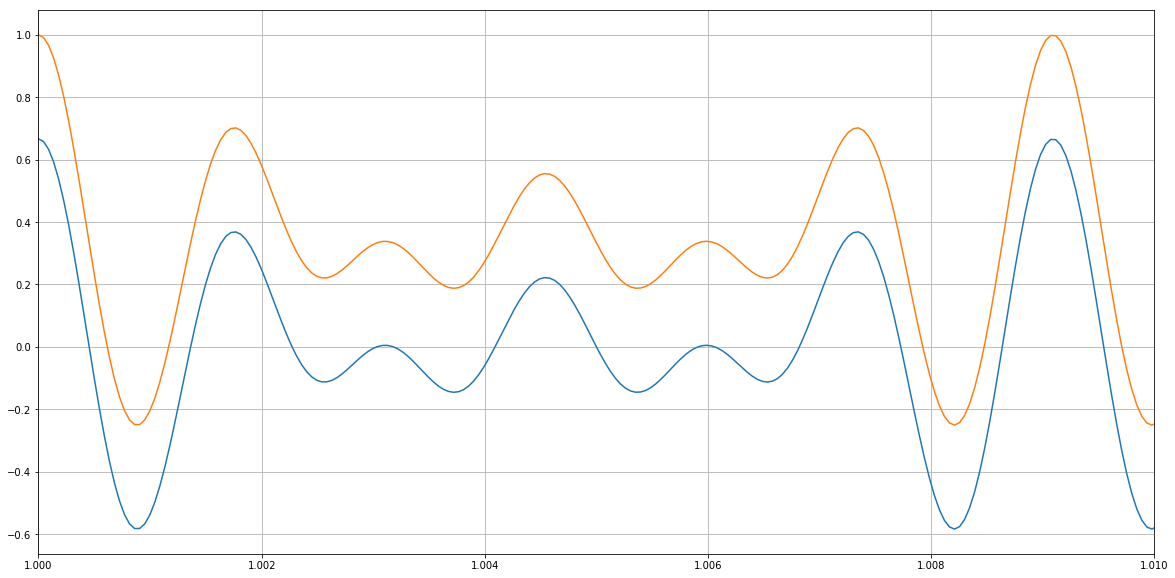

In [29]:
def sinusoide(t, f0):
    return np.cos(2 * np.pi * f0 * t) + 1/2

N = 1 # Une seule harmonique
Fs = 22050
Ts = 1/Fs
duration = 2
t = np.arange(0, duration, Ts)
Gain = np.ones(N)
Phase = np.zeros(N)

la = creer_signal_periodique(Phase, Gain, 440, t, Fs)
laQuinte = creer_signal_periodique(Phase, Gain, 3/2 * 440, t, Fs)
laTierce = creer_signal_periodique(Phase, Gain, 5/4 * 440, t, Fs)
accordParfait = creer_signal(la.x + laQuinte.x + laTierce.x, Fs)

plt.figure(1, figsize = (20, 10))
plt.plot(t, normaliser_son_mono(sinusoide(t, 440) + sinusoide(t, 3/2 * 440) + sinusoide(t, 5/4 * 440))-1/3)
plt.plot(t, accordParfait.x)
plt.grid()
plt.xlim(1, 1.01)
plt.show()

enregistrer_son("signal_parfait_P3_1.wav", accordParfait, Fs)

## 3.2 - Rapport tempérés

Reprendre la question précédente mais avec des rapports tempérés : $2^{4/12}$ et $2^{7/12}$ respectivement pour la tierce Majeure et la quinte. Entendez-vous une différence avec l'accord parfait de la question précédente? 

In [ ]:
# TODO

## 3.3 - Signal composite

Reprenez les deux questions précédentes mais cette fois, vous choisirez un son initial composite (c'est-à-dire avec des harmoniques).  


In [ ]:
# TODO

---

## Partie no 4 (optionnelle)

Reprenons le problème des cordes vibrantes. On suppose que la forme de la corde à l'instant initial - la fonction notée $y(0,u)$ pour $u\in [0,L]$ où $L$ est la longueur de la corde -  est un triangle de hauteur $h$ dont la pointe est d'abcisse $0<u_0<L$. On complète cette fonction (on appelle $\psi(u)$ la complétée) par symétrie impaire : voir la figure ci-dessous.  La courbe en bleu est la forme de la corde, et celle en rouge la complétée de la courbe bleue par symétrie impaire.

Cherchons l'équation de la corde sur pour chaque intervalle. Soit le signal $u\mapsto x(u)$

Pour $u\in[-L,-u_{0}]$ on a $x(u)=\frac{h}{u_{0}-L}(u+L)$

Pour $u\in[-u_{0}, u_{0}]$ on a $x(u)=\frac{h}{u_{0}}u$

Pour $u\in[u_{0},L]$ on a $x(u)=\frac{h}{u_{0}+L}(u-L)$

$$
\forall n \in \mathbb{N^*} \ \ : \ \ b_n=\frac{2}{T_0}\int_{(T_0)} x(t)\sin(2\pi n f_0 u)du.
$$
Soit
$$
b_n=\frac{1}{L}\int_{0}^{2L} x(t)\sin(\frac{\pi n}{L}  u)du.
$$

Comme il s'agit d'un signal $\mathcal{C}^1$ par morceaux nous allons séparer le calcul en trois intégrales

On pose $b_n$ en fonction de $h,L,u_0,n$ : 

$b_{n}=\frac{1}{L}\left(\frac{h}{u_{0}-L}\int_{-L}^{u_{0}}(u+L)\sin(\frac{\pi n}{L}u)du+\frac{h}{u_{0}}\int_{-u_{0}}^{u_{0}}u\sin(\frac{\pi n}{L}u)du+\frac{h}{u_{0}+L}\int_{u_{0}}^{L}(u-L)\sin(\frac{\pi n}{L}u)du\right)$


#### TODO: affirmation suivante très certainement fausse :
Or pour $u\in[-u_0, u_0]$ le signal présente une symétrie impaire par rapport à l'axe $\psi(u)$ donc $\frac{h}{u_{0}}\int_{-u_{0}}^{u_{0}}u\sin(\frac{\pi n}{L}u)du = 0$

Posons 
$$
\begin{alignat*}{1}
\alpha(u) = & \frac{h}{u_{0}-L}\int_{-L}^{u_{0}}(u+L)\sin\left(\frac{\pi n}{L}u\right)du\\
\beta(u)=&\frac{h}{u_{0}}\int_{-u_{0}}^{u_{0}}u\sin\left(\frac{\pi n}{L}u\right)du\\
\gamma(u)=&\frac{h}{u_{0}+L}\int_{u_{0}}^{L}(u-L)\sin\left(\frac{\pi n}{L}u\right)du
\end{alignat*}
$$

Ainsi

$$\begin{align*}
\alpha(u)= & \frac{h}{u_{0}-L}\int_{-L}^{u_{0}}(u+L)\sin\left(\frac{\pi n}{L}u\right)du\\
= & \frac{h}{u_{0}-L}\left(\frac{-L}{\pi n}\left[(u+L)\cos\left(\frac{\pi n}{L}u\right)\right]_{-L}^{-u_{0}}-\frac{-L}{\pi n}\int_{-L}^{-u_{0}}\cos\left(\frac{\pi n}{L}u\right)du\right)\\
= & \frac{-hL}{(u_{0}-L)\pi n}\left((-u_{0}+L)\cos\left(\frac{\pi n}{L}u_{0}\right)-\frac{L}{\pi n}\left[\sin\left(\frac{\pi n}{L}u\right)\right]_{-L}^{-u_{0}}\right)\\
= & \frac{-hL}{(u_{0}-L)\pi n}\left((-u_{0}+L)\cos\left(\frac{\pi n}{L}u_{0}\right)-\frac{L}{\pi n}(-1)\sin\left(\frac{\pi n}{L}u_{0}\right)\right)\\
\alpha(u)= & \fbox{${\frac{-hL}{(u_{0}-L)\pi n}\left((-u_{0}+L)\cos\left(\frac{\pi n}{L}u_{0}\right)+\frac{L}{\pi n}\sin\left(\frac{\pi n}{L}u_{0}\right)\right)}$}
\end{align*}$$

$$\begin{align*}
\gamma(u)= & \frac{h}{u_{0}+L}\int_{u_{0}}^{L}(u-L)\sin\left(\frac{\pi n}{L}u\right)du\\
= & \frac{h}{u_{0}+L}\left(\frac{-L}{\pi n}\left[(u-L)\cos\left(\frac{\pi n}{L}u\right)\right]_{u_{0}}^{L}-\frac{-L}{\pi n}\int_{u_{0}}^{L}\cos\left(\frac{\pi n}{L}u\right)du\right)\\
= & \frac{-hL}{(u_{0}+L)\pi n}\left(-(u_{0}-L)\cos\left(\frac{\pi n}{L}u_{0}\right)-\frac{L}{\pi n}\left[\sin\left(\frac{\pi n}{L}u\right)\right]_{u_{0}}^{L}\right)\\
= & \frac{-hL}{(u_{0}+L)\pi n}\left((-u_{0}+L)\cos\left(\frac{\pi n}{L}u_{0}\right)-\frac{L}{\pi n}(-1)\sin\left(\frac{\pi n}{L}u_{0}\right)\right)\\
\gamma(u)= & \fbox{${\frac{-hL}{(u_{0}+L)\pi n}\left((-u_{0}+L)\cos\left(\frac{\pi n}{L}u_{0}\right)+\frac{L}{\pi n}\sin\left(\frac{\pi n}{L}u_{0}\right)\right)}$}
\end{align*}$$

Et

$$\begin{align*}
\beta(u)= & \frac{h}{u_{0}}\int_{-u_{0}}^{u_{0}}u\sin\left(\frac{\pi n}{L}u\right)du\\
= & \frac{h}{u_{0}}\left(\frac{-L}{\pi n}\left[(u-L)\cos\left(\frac{\pi n}{L}u\right)\right]_{-u_{0}}^{u_{0}}-\frac{-L}{\pi n}\int_{-u_{0}}^{u_{0}}\cos\left(\frac{\pi n}{L}u\right)du\right)\\
= & \frac{-hL}{(u_{0}+L)\pi n}\left(u_{0}\cos\left(\frac{\pi n}{L}u_{0}\right){-}({-}u_{0})\cos\left(\frac{\pi n}{L}u_{0}\right)-\frac{L}{\pi n}\left[\sin\left(\frac{\pi n}{L}u\right)\right]_{-u_{0}}^{u_{0}}\right)\\
= & \frac{-hL}{(u_{0}+L)\pi n}\left(2u_{0}\cos\left(\frac{\pi n}{L}u_{0}\right)-\frac{L}{\pi n}\left(\sin\left(\frac{\pi n}{L}u_{0}\right){-}({-}1)\sin\left(\frac{\pi n}{L}u_{0}\right)\right)\right)\\
\beta(u)= & \fbox{${\frac{-2hL}{u_{0}\pi n}\left(2u_{0}\cos\left(\frac{\pi n}{L}u_{0}\right)-\frac{L}{\pi n}\sin\left(\frac{\pi n}{L}u_{0}\right)\right)}$}
\end{align*}$$

Sommons d'abord $\alpha(u)+\gamma(u)$ car ils sont de forme très similaire, soit:
$$\begin{align*}
\alpha(u)+\gamma(u)= & \frac{-hL}{(u_{0}+L)\pi n}\left((-u_{0}+L)\cos\left(\frac{\pi n}{L}u_{0}\right)+\frac{L}{\pi n}\sin\left(\frac{\pi n}{L}u_{0}\right)\right)\\
= & +\frac{-hL}{(u_{0}+L)\pi n}\left((-u_{0}+L)\cos\left(\frac{\pi n}{L}u_{0}\right)+\frac{L}{\pi n}\sin\left(\frac{\pi n}{L}u_{0}\right)\right)\\
= & \frac{-hL}{\pi n}\left(\left((-u_{0}+L)\cos\left(\frac{\pi n}{L}u_{0}\right)+\frac{L}{\pi n}\sin\left(\frac{\pi n}{L}u_{0}\right)\right)\left(\frac{1}{u_{0}-L}+\frac{1}{u_{0}+L}\right)\right)\\
= & \frac{-hL}{\pi n}\left(\left((-u_{0}+L)\cos\left(\frac{\pi n}{L}u_{0}\right)+\frac{L}{\pi n}\sin\left(\frac{\pi n}{L}u_{0}\right)\right)\frac{2u_{0}}{u_{0}^{2}-L^{2}}\right)\\
\alpha(u)+\gamma(u)= & \fbox{${\frac{-2u_{0}hL}{\pi n\left(u_{0}^{2}-L^{2}\right)}\left((-u_{0}+L)\cos\left(\frac{\pi n}{L}u_{0}\right)+\frac{L}{\pi n}\sin\left(\frac{\pi n}{L}u_{0}\right)\right)}$}
\end{align*}$$

On ajoute $\beta(u)$:
$$\begin{align*}
\alpha(u)+\beta(u)+\gamma(u)= & \frac{-2u_{0}hL}{\pi n\left(u_{0}^{2}-L^{2}\right)}\left((-u_{0}+L)\cos\left(\frac{\pi n}{L}u_{0}\right)+\frac{L}{\pi n}\sin\left(\frac{\pi n}{L}u_{0}\right)\right)\\
 & +\frac{-2hL}{u_{0}\pi n}\left(2u_{0}\cos\left(\frac{\pi n}{L}u_{0}\right)-\frac{L}{\pi n}\sin\left(\frac{\pi n}{L}u_{0}\right)\right)\\
\alpha(u)+\beta(u)+\gamma(u)= & \frac{-2hL}{\pi n}\left(\frac{u_{0}}{u_{0}^{2}-L^{2}}\left((-u_{0}+L)\cos\left(\frac{\pi n}{L}u_{0}\right)+\frac{L}{\pi n}\sin\left(\frac{\pi n}{L}u_{0}\right)\right)+\frac{1}{u_{0}}\left(u_{0}\cos\left(\frac{\pi n}{L}u_{0}\right)-\frac{L}{\pi n}\sin\left(\frac{\pi n}{L}u_{0}\right)\right)\right)
\end{align*}
$$

Enfin on réinjecte dans $b_n$
$$\begin{align*}
b_{n}= & \frac{1}{L}\left(\frac{-2hL}{\pi n}\left(\frac{u_{0}}{u_{0}^{2}-L^{2}}\left((-u_{0}+L)\cos\left(\frac{\pi n}{L}u_{0}\right)+\frac{L}{\pi n}\sin\left(\frac{\pi n}{L}u_{0}\right)\right)+\frac{1}{u_{0}}\left(u_{0}\cos\left(\frac{\pi n}{L}u_{0}\right)-\frac{L}{\pi n}\sin\left(\frac{\pi n}{L}u_{0}\right)\right)\right)\right)\\
= & \frac{-2h}{\pi n}\left(\frac{u_{0}}{u_{0}^{2}-L^{2}}\left((-u_{0}+L)\cos\left(\frac{\pi n}{L}u_{0}\right)+\frac{L}{\pi n}\sin\left(\frac{\pi n}{L}u_{0}\right)\right)+\frac{1}{u_{0}}\left(u_{0}\cos\left(\frac{\pi n}{L}u_{0}\right)-\frac{L}{\pi n}\sin\left(\frac{\pi n}{L}u_{0}\right)\right)\right)
\end{align*}
$$